In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac=1, random_state=3) #shuffling data

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

1. with heart disease: 644
2. without heart disease: 3596

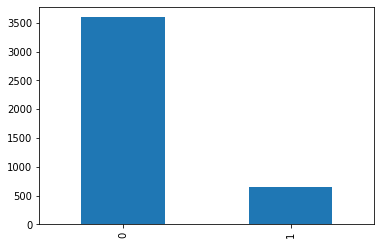

In [5]:
df['TenYearCHD'].value_counts().plot.bar()
plt.show()

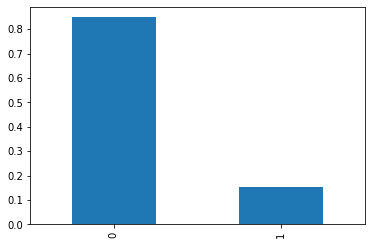

In [6]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()  #normalize used to get proportions
plt.show()

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
ms = df.isnull().sum()
ms[ms>0] #displaying only features with missing values

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

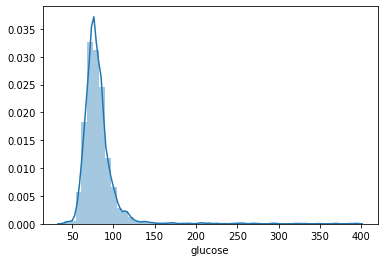

In [9]:
sns.distplot(df['glucose'].dropna())
plt.show()

In [10]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [11]:
df = df.fillna(method='ffill')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [13]:
y = df['TenYearCHD']
X =df.drop('TenYearCHD', axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [16]:
print(X_train.shape, X_test.shape)

(2968, 15) (1272, 15)


In [18]:
print(y_train.shape, y_test.shape)

(2968,) (1272,)


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [36]:
from sklearn.linear_model import LogisticRegression

Confusion matrix - train dataset: 
 [[2520   13]
 [ 400   35]]
Overall accuracy of model - train dataset: 0.8608490566037735
AUC Score - train dataset: 0.7313212718551896


Confusion matrix - test dataset: 
 [[1060    3]
 [ 200    9]]
Overall accuracy of model - test dataset: 0.8404088050314465
AUC Score - test dataset: 0.699491823718194


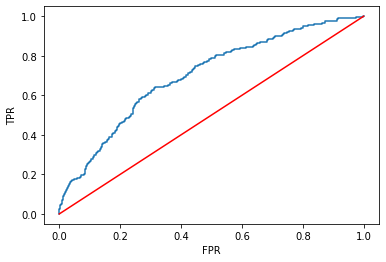

In [59]:
lr = LogisticRegression(fit_intercept=True, solver='liblinear') 

#as fit_intercept=True we dont need to add a constant in our data
#if solver not given a warning is displayed showing the default solver

lr.fit(X_train, y_train) 
#ML algorithm we mention x first and then y
#in stat, y first and then X

y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1] #slicing: all rows, second col as only we need second row

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
#model not predicting postives well, still accuracy of 86% given
#2520 - TN
#35 - TP
#Overall accuarcy = 2520+35 / 2520+400+13+35
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

#overall accuracy is quite comaparable between train and test (full data is not considered here)
#but auc is showing a difference of 4% approx, (full data is considered here)


#plot for 'test data' as we are evaluating the model mainly on the same
fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [38]:
y_train_pred

#calculate prob first and then a cut off of 0.5 is applied while calculating the y_train_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
y_train_prob

#returns prob of zeroes and prob. of ones: positive - negative pairs

array([0.09381002, 0.05688989, 0.13518496, ..., 0.26962125, 0.74418371,
       0.04530415])

In [40]:
y_train_prob.shape

(2968,)